In [1]:
import pydicom as dicom
import matplotlib.pyplot as plt
import csv 
import skimage
#from skimage.transform import resize
import os.path
from os import path
import pandas as pd
import numpy as np

In [2]:
file_path = '/Users/amalalmansour/Downloads/crops/'

In [3]:
IMG_PX_SIZE1 = 71
IMG_PX_SIZE2 = 71

In [4]:
def getNormed(this_array, this_min = 0, this_max = 255, set_to_int = True):
    new_var = this_array.copy()
    rat = (this_max - this_min)/(new_var.max() - new_var.min())
    new_var = new_var * rat
    new_var -= new_var.min()
    new_var += this_min
    if set_to_int:
        return new_var.astype('uint8')
    return new_var

In [5]:
def addZeroCenter(this_array, N1, N2):
    length = this_array.shape[0]
    width = this_array.shape[1]
    new_array = np.zeros((length + N1, width + N2))


    if N1 == 0 and N2 == 0:
        return this_array
    else:
        new_array[(N1//2):(N1//2)+length, (N2//2):(N2//2)+width] = this_array
        return new_array

In [6]:
df = pd.read_csv("/Users/amalalmansour/Downloads/SCNN-main/LIDC/Amal_Agreement/Spiculation_slices/max_padding/TestingValsALL_pad.csv")
pixel_ID = df["InstanceID"]

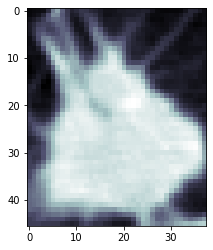

In [7]:
ds= dicom.dcmread('/Users/amalalmansour/Downloads/crops/4.dcm')
plt.imshow(ds.pixel_array, cmap=plt.cm.bone)

In [8]:
ds=ds.pixel_array

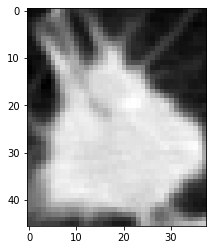

In [9]:
ds = getNormed(ds)
plt.imshow(ds,cmap='gray')

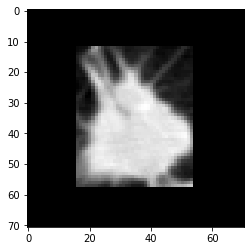

In [10]:
enlarged_image = addZeroCenter(ds,71-ds.shape[0], 71-ds.shape[1])
plt.imshow(enlarged_image,cmap='gray')

In [11]:
#enlarged_image.shape
arr = enlarged_image.flatten()
len(arr)

5041

In [12]:
#resized_img1 = resize(ds, (IMG_PX_SIZE1, IMG_PX_SIZE2), anti_aliasing=True)
#arr = resized_img1.flatten()
#len(arr)
#plt.imshow(resized_img1, cmap=plt.cm.bone)

In [13]:
image_array = []
noduleID_array = []
for i in pixel_ID:
    print(i)
    #print(arr4[i])
    noduleID_array.append(i)
    index = str(i) + ".dcm"
    if path.exists((file_path + index)):
        ds1 = dicom.dcmread(file_path + index)
        ds1 = ds1.pixel_array
        ds1 = getNormed(ds1)
        enlarged_image = addZeroCenter(ds1,71-ds1.shape[0], 71-ds1.shape[1])
        newArr = enlarged_image.flatten()
        #image_array.append(newArr)
        #resized_img1 = resize(ds1.pixel_array, (IMG_PX_SIZE1, IMG_PX_SIZE2), anti_aliasing=True)
        #newArr = resized_img1.flatten()
        
        #p.insert(newArr,0,i)
        arr = np.vstack((arr, newArr))

4
134
143
291
318
365
564
729
691
695
1023
1121
1209
1253
1307
1467
1673
1783
1849
1881
1982
1997
2029
2119
2212
2217
2240
2247
2302
2507
2591
2739
2799
2999
3259
3419
3528
3609
3679
3722
3672
3941
3967
3984
3972
4046
4053
4144
4166
4518
4468
4701
4732
4787
4854
4865
4947
4970
4993
5205
5195
5314
5370
5327
5380
5473
5752
5656
5683
5544
5723
5879
5987
5995
6054
6053
6085
6333
6449
6400
6463
6523
6751
6756
6800
6957
7001
6976
7106
7115
7162
7166
7413
7370
7254
7433
7531
7559
7647
7744
7905
7871
7864
7850
7963
8033
8094
8118
8125
8167
8181
8241
8359
8486
8493
8563
8641
8634
8628
8613
8738
8948
9020
9041
9076
9126
9165
9254
9305
9346
9365
9407
9521
9609
9625
9690
9683
9695
9752
9769
9826
9879
9895
9920
9966
9997
10104
10109
10234
10238
10356
10377
10448
10635
10649
10742
10797
11111
11293
11507
11543
11567
11601
11605
11777
11867
11875
11887
11977
12096
12142
12170
12240
12407
12435
12440
12486
12499
12647
12756
12962
12967
12970
13045
13125
13198
13271
13368
13501
13553
13624
13612
13706


In [14]:
output_file = '/Users/amalalmansour/Downloads/SCNN-main/LIDC/Amal_Agreement/Spiculation_slices/SCNN/TestingValsALL.csv'
#where to save the csv file
np.savetxt(output_file, arr, fmt= "%10.5f", delimiter=',')
print("done")

done
